In [27]:
import pandas as pd
import shapefile
import numpy as np

In [28]:
epsv3 = pd.read_csv(".\Results\EPSV3.csv")
county_gis = shapefile.Reader(r"..\..\Local\gisjoin.shp")
demog_df = pd.read_csv(r"..\Public Data\Processed_Census2020.csv")
demog_df
allcoded = pd.read_excel(".\Results\All Coded Variables.xlsx")

In [29]:
gis=pd.DataFrame([county_gis.record(i).as_dict() for i in range(len(county_gis))])
gis.head(4)

,FID_1,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POPULATION,POP_SQMI,POP2010,POP10_SQMI,...,CROP_ACR12,AVE_SALE12,SQMI,NO_FARMS17,AVE_SIZE17,CROP_ACR17,AVE_SALE17,Shape_Leng,SHAPE_Le_1,SHAPE_Area
0,1,Autauga County,Alabama,01,001,01001,58224,96.3,54571,90.3,...,41293.0,50929.0,604.37,371.0,305.0,36890.0,57844.0,2.066033,2.066033,0.150256
1,2,Baldwin County,Alabama,01,003,01003,227660,139.4,182265,111.1,...,100901.0,137069.0,1633.14,842.0,208.0,110438.0,142972.0,9.305629,9.305629,0.398404
2,3,Barbour County,Alabama,01,005,01005,26326,29.1,27457,30.4,...,41301.0,182761.0,904.52,498.0,307.0,37304.0,211977.0,2.695260,2.695260,0.223270
3,4,Bibb County,Alabama,01,007,01007,23066,36.8,22915,36.6,...,12608.0,0.0,626.17,205.0,273.0,15823.0,20484.0,1.887519,1.887519,0.156473


In [30]:
def FIPS_transformer(sx,x):
    if len(str(sx))==1:
        sx = str("0"+str(sx))
    else:
        sx = str(sx)
    if x % 10 == 0 and sx not in ["02","15"]:
        x = str(int(x/10))
    else:
        if sx == "15":
            x = str(x)[0]
        x = str(x)
    if len(str(x))==1:
        x = "00"+str(x)
    elif len(str(x))==2:
        x = "0" + str(x)
    
    return sx + x

In [31]:
epsv3["converted_FIPS"]=epsv3.apply(lambda x: FIPS_transformer(x["STATEFIPS"],x["COUNTYFIPS"]),axis=1)
demog_df["converted_FIPS"]=demog_df.apply(lambda x: FIPS_transformer(x["STATEFIPS"],x["COUNTYFIPS"]),axis=1)

In [32]:
temp=epsv3.merge(gis,left_on="converted_FIPS",right_on="FIPS",how="left")
temp.head(4)

,Unnamed: 0,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,EPSV3,converted_FIPS,FID_1,...,CROP_ACR12,AVE_SALE12,SQMI,NO_FARMS17,AVE_SIZE17,CROP_ACR17,AVE_SALE17,Shape_Leng,SHAPE_Le_1,SHAPE_Area
0,0,Alabama,G0100010,41.0,1,10,Autauga,1,01001,1.0,...,41293.0,50929.0,604.37,371.0,305.0,36890.0,57844.0,2.066033,2.066033,0.150256
1,1,Alabama,G0100030,41.0,1,30,Baldwin,0,01003,2.0,...,100901.0,137069.0,1633.14,842.0,208.0,110438.0,142972.0,9.305629,9.305629,0.398404
2,2,Alabama,G0100050,41.0,1,50,Barbour,0,01005,3.0,...,41301.0,182761.0,904.52,498.0,307.0,37304.0,211977.0,2.695260,2.695260,0.223270
3,3,Alabama,G0100070,41.0,1,70,Bibb,0,01007,4.0,...,12608.0,0.0,626.17,205.0,273.0,15823.0,20484.0,1.887519,1.887519,0.156473


In [33]:
np.sum(temp["SQMI"].isna())

117

In [34]:
epsv3.loc[(epsv3["STATE"]=="Alaska") & (epsv3["ALLCOUNTIES"]=="Wrangell City and Borough"),"converted_FIPS"]="02275"
epsv3.loc[(epsv3["STATE"]=="Nevada") & (epsv3["ALLCOUNTIES"]=="Carson City"),"converted_FIPS"]	="32510"	

In [35]:
epsv3[(epsv3["STATE"]=="Nevada") & (epsv3["ALLCOUNTIES"]=="Carson City")]

,Unnamed: 0,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,EPSV3,converted_FIPS
1774,1774,Nevada,G3101030,NaN,32,510,Carson City,0,32510


In [36]:
temp2=gis.merge(epsv3,left_on="FIPS",right_on="converted_FIPS",how="left")

In [37]:
np.sum(temp2["GISJOIN"].isna())

0

In [38]:
epsv3[epsv3["STATEFIPS"]==15]

,Unnamed: 0,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,EPSV3,converted_FIPS
571,571,Hawaii,G1302050,82.0,15,15,Hawaii,0,15001
572,572,Hawaii,G1302070,82.0,15,35,Honolulu,0,15003
573,573,Hawaii,G1302090,NaN,15,5,Kalawao,0,15005
574,574,Hawaii,G1302110,82.0,15,75,Kauai,0,15007
575,575,Hawaii,G1302130,82.0,15,95,Maui,0,15009


In [39]:
# temp2[temp2["GISJOIN"].isna()]

In [40]:
# temp2=temp2[["FIPS","EP.SV3"]]
# temp2["FIPS"]=temp2["FIPS"].astype(str)

# temp2

In [41]:
# foo =pd.DataFrame({"FIPS":"foo","EP.SV3":0},index=range(20)).reset_index(drop=True)
# temp2=pd.concat([foo,temp2])
# temp2

## Output A Single DF that Contains ALL 5 Labels

In [42]:
allcoded

,Unnamed: 0,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,GR.SV2,GR.LRA2,GR.LRA3,MM.LRA1,EP.SV1,EP.LRA1,EP.SV2,EP.LRA2,EP.SV3
0,1,Alabama,G0100010,41.0,1,10,Autauga,1,1,1,1,0,0,0,0,1
1,2,Alabama,G0100030,41.0,1,30,Baldwin,1,1,1,1,0,0,0,1,0
2,3,Alabama,G0100050,41.0,1,50,Barbour,1,1,1,1,0,0,0,0,0
3,4,Alabama,G0100070,41.0,1,70,Bibb,1,1,1,1,0,0,0,0,0
4,5,Alabama,G0100090,41.0,1,90,Blount,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,3254,Wyoming,G5500650,68.0,56,390,Teton,1,1,1,1,0,0,0,0,0
3254,3255,Wyoming,G5500670,68.0,56,410,Uinta,1,1,1,1,0,0,0,0,0
3255,3256,Wyoming,G5500690,68.0,56,430,Washakie,1,1,1,1,0,0,0,0,0
3256,3257,Wyoming,G5500710,68.0,56,450,Weston,1,1,1,1,0,0,0,0,0


In [43]:
epfactor=min(np.log2(3258/(allcoded[["EP.LRA1","EP.SV1","EP.SV2","EP.LRA2","EP.SV3"]]==1).sum()).mean(),1)
epfactor

1

In [44]:
grfactor=np.log2(3258/(allcoded[["GR.SV2","GR.LRA2","GR.LRA3"]]==1).sum()).mean()
grfactor

0.30109301995892374

In [45]:
mmfactor=np.log2(3258/(allcoded[["MM.LRA1"]]==1).sum()).mean()
mmfactor

0.0596688255258534

In [46]:
totfactor = epfactor + mmfactor + grfactor
epfactor = 1
mmfactor = 1
grfactor = 1

FIPS        fOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOf...
GR.SV2                                                   2520
GR.LRA2                                                  2527
GR.LRA3                                                  2544
MM.LRA1                                                  3013
EP.SV1                                                    128
EP.LRA1                                                   240
EP.SV2                                                    368
EP.LRA2                                                   217
EP.SV3                                                    256
Time1Sum                                                 3381
Time2Sum                                                 5632
Time3Sum                                                 2800
tot                                                     11813
dtype: object
3163

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=(
    "scaler", StandardScaler(),["Time1Sum","Time2Su","Time3Sum"]
),remainder="passthrough")

In [48]:
# def gis_converter(x:pd.DataFrame,col_name, output_name):
#     x["converted_FIPS"] = x.apply(lambda x: FIPS_transformer(x["STATEFIPS"],x["COUNTYFIPS"]),axis=1)
#     x.loc[(x["STATE"]=="Alaska") & (x["ALLCOUNTIES"]=="Wrangell City and Borough"),"converted_FIPS"]="02275"
#     x.loc[(x["STATE"]=="Nevada") & (x["ALLCOUNTIES"]=="Carson City"),"converted_FIPS"]	="32510"	
#     mg = gis.merge(x,left_on="FIPS",right_on="converted_FIPS",how="left")
#     print(np.sum(mg["GISJOIN"].isna()))
#     assert np.sum(mg["GISJOIN"].isna())==0
#     print(mg.shape)
#     mg = mg.iloc[:,[5,-2]]
#     mg["FIPS"] = mg["FIPS"].astype(str)
#     foo =pd.DataFrame({"FIPS":"foo",col_name:0},index=range(20)).reset_index(drop=True)
#     mg=pd.concat([foo,mg])
#     print(mg)
#     mg.to_csv(".\\ArcGIS Joins\\"+output_name,header=False)


def gis_converter(x:pd.DataFrame,col_name, output_name):
    x["converted_FIPS"] = x.apply(lambda x: FIPS_transformer(x["STATEFIPS"],x["COUNTYFIPS"]),axis=1)
    x.loc[(x["STATE"]=="Alaska") & (x["ALLCOUNTIES"]=="Wrangell City and Borough"),"converted_FIPS"]="02275"
    x.loc[(x["STATE"]=="Nevada") & (x["ALLCOUNTIES"]=="Carson City"),"converted_FIPS"]	="32510"	
    mg = gis.merge(x,left_on="FIPS",right_on="converted_FIPS",how="left")
    print(np.sum(mg["GISJOIN"].isna()))
    assert np.sum(mg["GISJOIN"].isna())==0
    mg = mg[["FIPS","GR.SV2",	"GR.LRA2",	"GR.LRA3"	,"MM.LRA1",	"EP.SV1",	"EP.LRA1"	,"EP.SV2",	"EP.LRA2",	"EP.SV3"]]
    mg["FIPS"] = mg["FIPS"].astype(str)
    mg["Time1Sum"]=mg.apply(lambda x: max(0,np.dot(x[["EP.SV1",	"EP.LRA1", "MM.LRA1"]],[np.log10(3163/128),np.log10(3163/240),np.log10(3163/3013)]))/3,axis=1)
    mg["Time2Sum"]=mg.apply(lambda x: max(np.dot(x[["EP.SV2",	"EP.LRA2","GR.LRA2","GR.SV2"]],[np.log10(3163/368),np.log10(3163/217),np.log10(3163/2527),np.log10(3163/2520)])/4,0),axis=1)
    mg["Time3Sum"]=mg.apply(lambda x: max(np.dot(x[["EP.SV3",	"GR.LRA3"]],[np.log10(3163/256),np.log10(3163/2544)]),0)/2,axis=1)
    mg["tot"]=mg.apply(lambda x: np.sum(x[["GR.SV2",	"GR.LRA2",	"GR.LRA3"	,"MM.LRA1",	"EP.SV1",	"EP.LRA1"	,"EP.SV2",	"EP.LRA2",	"EP.SV3"]]),axis=1)
    
    mg["Time1Sum"] /= max(mg["Time1Sum"])
    mg["Time2Sum"] /= max(mg["Time2Sum"])
    mg["Time3Sum"] /= max(mg["Time3Sum"])
    display(mg.head(40))
    foo =pd.DataFrame(0,index=range(20),columns=mg.columns).reset_index(drop=True)
    mg=pd.concat([foo,mg])
    mg.loc[mg["FIPS"]==0,["FIPS"]]="fOO"
    mg.loc[mg["FIPS"]==0,["Time1Sum","Time2Sum","Time3Sum","tot"]]="fOO"
    mg.to_csv(".\\ArcGIS Joins\\"+output_name,header=True)
    return mg

In [49]:
epfactor

1

In [50]:
np.dot([1,1],[epfactor,grfactor])/2

1.0

In [51]:
np.dot([1,0,1],[mmfactor,epfactor,epfactor])/3

0.6666666666666666

In [52]:
df=gis_converter(allcoded.iloc[:,:],"EPLRA1","All.csv")

0


,FIPS,GR.SV2,GR.LRA2,GR.LRA3,MM.LRA1,EP.SV1,EP.LRA1,EP.SV2,EP.LRA2,EP.SV3,Time1Sum,Time2Sum,Time3Sum,tot
0,01001,1,1,1,1,0,0,0,0,1,0.008327,0.085521,1.000000,5
1,01003,1,1,1,1,0,0,0,1,0,0.008327,0.592756,0.079719,5
2,01005,1,1,1,1,0,0,0,0,0,0.008327,0.085521,0.079719,4
3,01007,1,1,1,1,0,0,0,0,0,0.008327,0.085521,0.079719,4
4,01009,1,1,1,1,0,0,0,0,0,0.008327,0.085521,0.079719,4
5,01011,1,1,1,1,0,0,0,0,0,0.008327,0.085521,0.079719,4
6,01013,1,1,1,1,0,0,0,1,0,0.008327,0.592756,0.079719,5
7,01015,1,1,1,1,0,0,1,1,1,0.008327,1.000000,1.000000,7
8,01017,1,1,1,1,0,0,0,0,0,0.008327,0.085521,0.079719,4
9,01019,1,1,1,1,0,0,0,0,0,0.008327,0.085521,0.079719,4


In [ ]:
import seaborn as sns

In [53]:
df.isna().sum()

FIPS        0
GR.SV2      0
GR.LRA2     0
GR.LRA3     0
MM.LRA1     0
EP.SV1      0
EP.LRA1     0
EP.SV2      0
EP.LRA2     0
EP.SV3      0
Time1Sum    0
Time2Sum    0
Time3Sum    0
tot         0
dtype: int64

c:\Users\longy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time1Sum'>

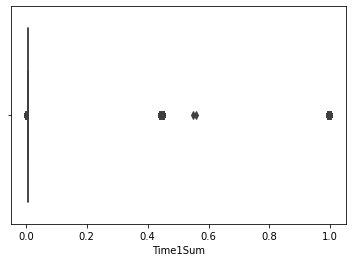

In [ ]:

sns.boxplot(df["Time1Sum"])

c:\Users\longy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time2Sum'>

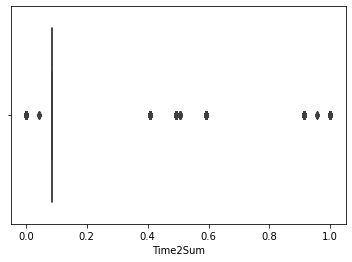

In [ ]:

sns.boxplot(df["Time2Sum"])

c:\Users\longy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time3Sum'>

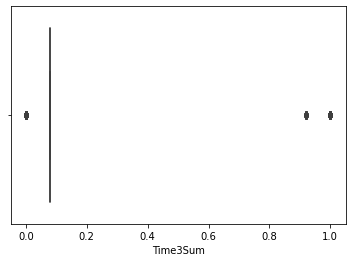

In [ ]:

sns.boxplot(df["Time3Sum"])

In [ ]:
df[df["Time1Sum"]==max(df["Time1Sum"])]

,FIPS,GR.SV2,GR.LRA2,GR.LRA3,MM.LRA1,EP.SV1,EP.LRA1,EP.SV2,EP.LRA2,EP.SV3,Time1Sum,Time2Sum,Time3Sum,tot
36,01073,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,9
185,06001,0,0,0,1,1,1,1,1,0,1.0,0.914479,0.0,5
191,06013,0,0,0,1,1,1,1,1,0,1.0,0.914479,0.0,5
194,06019,1,1,0,1,1,1,0,0,0,1.0,0.085521,0.0,5
218,06067,1,1,0,1,1,1,1,1,0,1.0,1.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,54011,1,1,1,1,1,1,0,0,0,1.0,0.085521,0.079719,6
3016,54051,1,1,1,1,1,1,0,0,0,1.0,0.085521,0.079719,6
3040,54099,1,1,1,1,1,1,0,0,0,1.0,0.085521,0.079719,6
3067,55043,1,1,1,1,1,1,0,0,0,1.0,0.085521,0.079719,6


In [ ]:
df[df["Time2Sum"]==max(df["Time2Sum"])]

,FIPS,GR.SV2,GR.LRA2,GR.LRA3,MM.LRA1,EP.SV1,EP.LRA1,EP.SV2,EP.LRA2,EP.SV3,Time1Sum,Time2Sum,Time3Sum,tot
7,01015,1,1,1,1,0,0,1,1,1,0.007033,0.573521,0.593221,7
36,01073,1,1,1,1,1,1,1,1,1,0.844626,0.573521,0.593221,9
41,01083,1,1,1,1,0,0,1,1,0,0.007033,0.573521,0.047291,6
44,01089,1,1,1,0,0,0,1,1,1,0.0,0.573521,0.593221,6
48,01097,1,1,1,1,0,1,1,1,1,0.380329,0.573521,0.593221,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,51650,1,1,1,1,1,1,1,1,1,0.844626,0.573521,0.593221,9
2936,51700,1,1,1,1,1,1,1,1,1,0.844626,0.573521,0.593221,9
2947,51800,1,1,1,1,0,0,1,1,0,0.007033,0.573521,0.047291,6
2948,51810,1,1,1,1,0,1,1,1,0,0.380329,0.573521,0.047291,7


In [ ]:
df.std()

C:\Users\longy\AppData\Local\Temp/ipykernel_33276/3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


GR.SV2      0.402509
GR.LRA2     0.400867
GR.LRA3     0.396802
MM.LRA1     0.212576
EP.SV1      0.197085
EP.LRA1     0.264844
EP.SV2      0.320689
EP.LRA2     0.252822
EP.SV3      0.272780
Time1Sum    0.205597
Time2Sum    0.201146
Time3Sum    0.235686
tot         1.180493
dtype: float64

In [ ]:
df[df["FIPS"]=="06037"]

,FIPS,GR.SV2,GR.LRA2,GR.LRA3,MM.LRA1,EP.SV1,EP.LRA1,EP.SV2,EP.LRA2,EP.SV3,Time1Sum,Time2Sum,Time3Sum,tot
203,06037,0,1,0,0,1,1,1,1,0,2.512777,2.195385,0.0,5


In [ ]:
np.unique(df.iloc[:,12])

array([0.0, 0.09458208493934658, 1.0918592266038734, 1.18644131154322],
      dtype=object)

In [ ]:
df.sum()

FIPS        fOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOfOOf...
GR.SV2                                                   2520
GR.LRA2                                                  2527
GR.LRA3                                                  2544
MM.LRA1                                                  3013
EP.SV1                                                    128
EP.LRA1                                                   240
EP.SV2                                                    368
EP.LRA2                                                   217
EP.SV3                                                    256
Time1Sum                                            510.63741
Time2Sum                                           1091.40208
Time3Sum                                           520.132786
tot                                                     11813
dtype: object

In [ ]:
df

,FIPS,GR.SV2,GR.LRA2,GR.LRA3,MM.LRA1,EP.SV1,EP.LRA1,EP.SV2,EP.LRA2,EP.SV3,Time1Sum,Time2Sum,Time3Sum,tot
0,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
1,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
2,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
3,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
4,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56041,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4
3139,56043,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4
3140,56045,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4
3141,02063,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4


In [ ]:
ct = ColumnTransformer([(
    "scaler", StandardScaler(),["Time1Sum","Time2Sum","Time3Sum"]
)],remainder="drop")

In [ ]:
df

,FIPS,GR.SV2,GR.LRA2,GR.LRA3,MM.LRA1,EP.SV1,EP.LRA1,EP.SV2,EP.LRA2,EP.SV3,Time1Sum,Time2Sum,Time3Sum,tot
0,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
1,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
2,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
3,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
4,fOO,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56041,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4
3139,56043,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4
3140,56045,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4
3141,02063,1,1,1,1,0,0,0,0,0,0.0211,0.196193,0.094582,4


In [ ]:
ct.fit_transform(df)

array([[-0.3070008 , -0.67142344, -0.54238277],
       [-0.3070008 , -0.67142344, -0.54238277],
       [-0.3070008 , -0.67142344, -0.54238277],
       ...,
       [-0.26687629, -0.2896607 , -0.23042218],
       [-0.26687629, -0.2896607 , -0.23042218],
       [-0.26687629, -0.2896607 , -0.23042218]])

In [ ]:
# gis_converter(pd.read_csv(".\Results\EPSV3.csv"),"EP.SV3","EPSV3.csv")
# gis_converter(pd.read_csv(".\Results\EPSV2.csv"),"EPSV2","EPSV2.csv")
# gis_converter(pd.read_csv(".\Results\EPLRA2.csv"),"EPLRA2","EPLRA2.csv")
# gis_converter(pd.read_csv(".\Results\EPSV1.csv"),"EPSV1","EPSV1.csv")
# gis_converter(pd.read_csv(".\Results\EPLRA1.csv"),"EPLRA1","EPLRA1.csv")

In [ ]:
# combined = pd.read_csv(".\ArcGIS Joins\EPLRA1.csv")
# combined = combined.rename(columns={"0.1":"EPLRA1"})
# combined = combined.drop(columns="0")

# eplra2 = pd.read_csv(".\ArcGIS Joins\EPLRA2.csv")
# eplra2=eplra2.rename(columns={"0.1":"EPLRA2"})
# eplra2=eplra2.drop(columns="0")
# combined=combined.merge(eplra2,on="foo",how="left")

# epsv2 = pd.read_csv(".\ArcGIS Joins\EPSV2.csv")
# epsv2 = epsv2.rename(columns={"0.1":"EPSV2"})
# epsv2 = epsv2.drop(columns="0")
# combined=combined.merge(epsv2,on="foo",how="left")

# epsv1 = pd.read_csv(".\ArcGIS Joins\EPSV1.csv")
# epsv1 = epsv1.rename(columns={"0.1":"EPSV1"})
# epsv1 = epsv1.drop(columns="0")
# combined=combined.merge(epsv1,on="foo",how="left")

# epsv3 = pd.read_csv(".\ArcGIS Joins\EPSV3.csv")
# epsv3 = epsv3.rename(columns={"0.1":"EPSV3"})
# epsv3 = epsv3.drop(columns="0")
# combined=combined.merge(epsv3,on="foo",how="left")
# foo = pd.DataFrame({"foo":"foo","EPLRA1":0,"EPLRA2":0,"EPSV2":0,"EPSV3":0},index=range(20)).reset_index(drop=True)
# combined=pd.concat([foo,combined[combined["foo"]!="foo"]])


# combined["SUM"]=np.sum(combined.iloc[:,1:],axis=1)


# combined=combined.merge(demog_df,left_on="foo",right_on="converted_FIPS",how="left")
# combined["more_black_pop"] = (combined["Percentage_of_People_Racialized_as_Black"]>=14.2).astype(int)
# combined = combined.drop(columns=["Percentage_of_People_Racialized_as_Black","converted_FIPS"])

# combined.to_csv(".\ArcGIS Joins\combined.csv")